In [1]:
import matplotlib.pyplot as plt
from detectron2.data import DatasetCatalog, MetadataCatalog
from PIL import Image
from register_dataset import register_smiles_dataset

In [2]:
register_smiles_dataset(
    dataset_name="smiles_dataset",
    dataset_dir="../dataset",
)
smiles_metadata = MetadataCatalog.get("smiles_dataset")
smiles_dataset = DatasetCatalog.get("smiles_dataset")

✓ Registered dataset 'smiles_dataset' with 6 categories
  Categories: ['AROMATIC-NONE', 'ATOM', 'DOUBLE-NONE', 'SINGLE-BEGINDASH', 'SINGLE-BEGINWEDGE', 'SINGLE-NONE']


In [3]:
# look for sample with a SINGLE-BEGINDASH
sample = next(s for s in smiles_dataset if any(ann["category_id"] == 3 for ann in s["annotations"]))

cats = [ann["category_id"] for ann in sample["annotations"]]
print(cats)

[1, 4, 1, 4, 1, 5, 1, 1, 5, 5, 5, 3, 5, 4, 5]


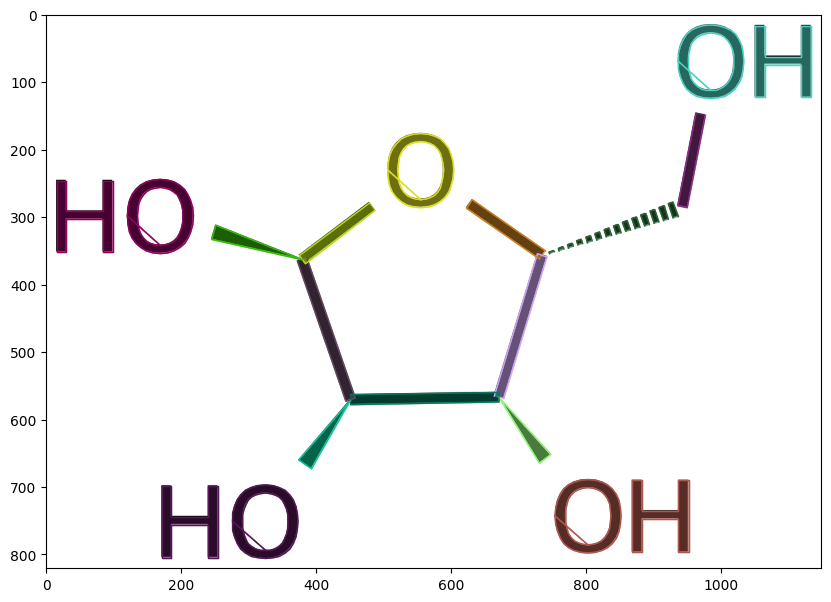

In [4]:
import random

img = Image.open(sample["file_name"])
colors = [(random.random(), random.random(), random.random()) for _ in sample["annotations"]]
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)

for ann, color in zip(sample["annotations"], colors):
    for poly in ann["segmentation"]:
        x = poly[::2]
        y = poly[1::2]
        ax.plot(x, y, linewidth=1, color=color)
        ax.fill(x, y, color=color + (0.5,))